In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

### Ouverture du Dataframe

In [2]:
df1 = pd.read_csv("datas/train.csv")

In [3]:
df1.head(5)

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\r\nWhy the edits made under my use...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\r\nMore\r\nI can't make any real suggestions...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


#### Nous avons donc 159 571 commentaires en tout, les critères de toxicités sont:
 * _toxic_
 * _severe_toxic_
 * _osbscene_
 * _threat_
 * _insult_
 * _identity_hate_

### Quelques commentaires toxiques...

In [5]:
df1[df1['toxic']>0.1].head(5)

id                                       comment_text  \
6   0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
12  0005c987bdfc9d4b  Hey... what is it..\r\n@ | talk .\r\nWhat is i...   
16  0007e25b2121310b  Bye! \r\n\r\nDon't look, come or think of comm...   
42  001810bf8c45bf5f  You are gay or antisemmitian? \r\n\r\nArchange...   
43  00190820581d90ce           FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!   

    toxic  severe_toxic  obscene  threat  insult  identity_hate  
6       1             1        1       0       1              0  
12      1             0        0       0       0              0  
16      1             0        0       0       0              0  
42      1             0        1       0       1              1  
43      1             0        1       0       1              0

### On remarque que l'utilisation abusive de majuscule semble être importante.
#### Nous allons sommer les différents scores dans un seul pour différencier les commentaires toxiques des autres

In [6]:
df1['sum_score'] = df1.loc[:, 'toxic':'identity_hate'].sum(axis=1)

In [7]:
df1[df1['sum_score']>3].tail(5)

id                                       comment_text  \
159281  fb726deec64157bd  LoL!! \r\n\r\nyou're GAY!! you will never know...   
159312  fbf20e312cd4a78d  Walter Mercado \r\n\r\nAntonio, quite frankly,...   
159336  fc3efa2f6f025f6d  Oh, fuck off. The pansy Jew would just whine a...   
159400  fd052883fa6a8697  Shalom \r\n\r\nSemite, get the fuck out of her...   
159494  fef4cf7ba0012866  "\r\n\r\n our previous conversation \r\n\r\nyo...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  sum_score  
159281      1             1        1       0       1              1          5  
159312      1             1        1       0       1              0          4  
159336      1             0        1       0       1              1          4  
159400      1             1        1       1       1              1          6  
159494      1             0        1       0       1              1          4

In [8]:
tox = df1[df1['sum_score']>0.1]
tox.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16225 entries, 6 to 159554
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             16225 non-null  object
 1   comment_text   16225 non-null  object
 2   toxic          16225 non-null  int64 
 3   severe_toxic   16225 non-null  int64 
 4   obscene        16225 non-null  int64 
 5   threat         16225 non-null  int64 
 6   insult         16225 non-null  int64 
 7   identity_hate  16225 non-null  int64 
 8   sum_score      16225 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.2+ MB


#### Parmi tous les commentaires, seuls 16225 sont considérés comme toxiques; soit un peu plus de 10%.
#### Observons la répartition de ces commentaires par rapport à leurs critères de toxicité.

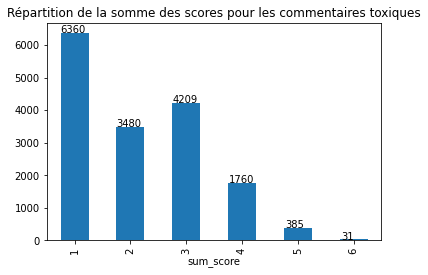

In [9]:
ax = tox.groupby('sum_score').size().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Répartition de la somme des scores pour les commentaires toxiques');

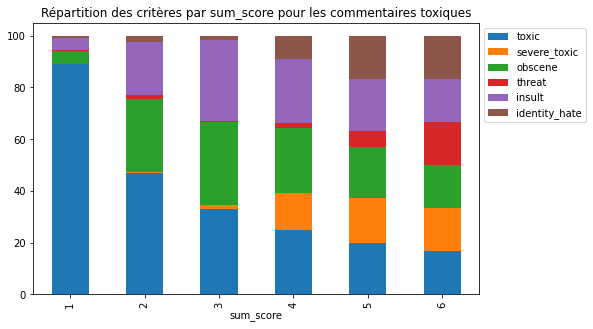

In [10]:
criteres = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
df2 = tox.groupby(['sum_score']).agg({k:'sum' for k in criteres})
df2.T.apply(lambda r: r/r.sum()*100, axis=0).T.plot.bar(
    title="Répartition des critères par sum_score pour les commentaires toxiques",
    stacked=True,
    figsize=(8,5),
    
).legend(bbox_to_anchor=(1, 1));

In [11]:
df2.T.apply(lambda r: r/r.sum()*100, axis=0)

sum_score              1          2          3          4          5  \
toxic          89.088050  46.882184  33.174943  25.000000  20.000000   
severe_toxic    0.000000   0.589080   1.473034  14.318182  17.090909   
obscene         4.984277  27.931034  31.868219  24.829545  20.000000   
threat          0.345912   1.695402   0.372218   1.988636   6.233766   
insult          4.732704  20.502874  31.551437  24.843750  20.000000   
identity_hate   0.849057   2.399425   1.560149   9.019886  16.675325   

sum_score              6  
toxic          16.666667  
severe_toxic   16.666667  
obscene        16.666667  
threat         16.666667  
insult         16.666667  
identity_hate  16.666667

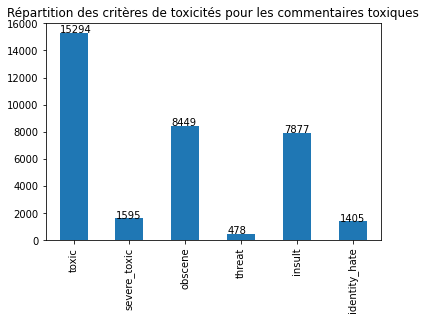

In [12]:

ax = df1[criteres].sum().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Répartition des critères de toxicités pour les commentaires toxiques');

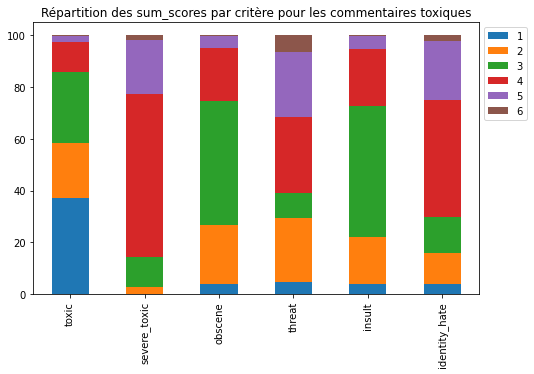

In [13]:

df2.apply(lambda r: r/r.sum()*100, axis=0).T.plot.bar(
    title="Répartition des sum_scores par critère pour les commentaires toxiques",
    stacked=True,
    figsize=(8,5),
    
).legend(bbox_to_anchor=(1, 1));

In [14]:
tox['sum_score'].describe()

count    16225.000000
mean         2.163205
std          1.141435
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: sum_score, dtype: float64

In [15]:
df1['sum_score'].describe()

count    159571.000000
mean          0.219952
std           0.748260
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: sum_score, dtype: float64

#### On remarque que presque tous les commentaires toxiques ont le critère _toxic_ et que la répartition est très inégale.

## Critères supplémentaires
### 1. longueur des commentaires

In [16]:
df1['text_len'] = df1['comment_text'].apply(lambda row: len(row))

In [17]:
df1.head(5)

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\r\nWhy the edits made under my use...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\r\nMore\r\nI can't make any real suggestions...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  sum_score  text_len  
0             0        0       0       0              0          0       265  
1             0        0       0       0              0          0       112  
2             0        0       0       0              0          0       233  
3             0        0       0       0              0          0       626  
4             0        0       0       0              0          0        67

In [18]:
df1['text_len'].describe()

count    159571.000000
mean        396.593961
std         594.387869
min           6.000000
25%          97.000000
50%         207.000000
75%         438.000000
max        5000.000000
Name: text_len, dtype: float64

<AxesSubplot:ylabel='Frequency'>

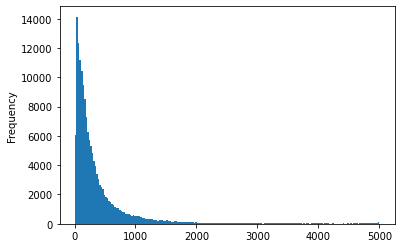

In [19]:
df1['text_len'].plot(kind='hist', bins=200)

### Observons les commentaires les plus longs et les plus courts

In [20]:
df1[df1['text_len']>4500]

id                                       comment_text  \
321     00ced92ee28c7ee8  "\r\n\r\n66.185.85.80's rant\r\n\r\nPresently,...   
864     025c5d5f1bf91d84  "\r\n\r\nReplacement\r\n\r\nPLEASE DO NOT EDIT...   
1184    0334049b60e326b8  And \r\n\r\nPaganism\r\n\r\nSouthgate, who has...   
1260    0362add8c95bfc0b  "\r\n\r\n Silesians \r\n\r\nAndrew, I have not...   
1308    0392452585b760e3  "\r\nWrong licenses\r\nI have corrected the li...   
...                  ...                                                ...   
158818  f4476a1a6bf0a6a9  "POSTED FROM MARYLAND TALK PAGE WITH ACKNOWLED...   
158970  f6883b0b85b0dbd7  Hi Wikipedia!!Hi Wikipedia!!Hi Wikipedia!!Hi W...   
159203  fa35aba966be5657  "\r\n\r\nFourth Examination, 17th December, 14...   
159417  fd5773ec2e4bcf3a  "\r\n\r\n News suppressed on Wikipedia http://...   
159483  fec6961acc20d82e  I have just followed from your edit exchange o...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  \
321         0             0        0       0       0              0   
864         0             0        0       0       0              0   
1184        0             0        0       0       0              0   
1260        0             0        0       0       0              0   
1308        0             0        0       0       0              0   
...       ...           ...      ...     ...     ...            ...   
158818      0             0        0       0       0              0   
158970      0             0        0       0       0              0   
159203      0             0        0       0       0              0   
159417      0             0        0       0       0              0   
159483      0             0        0       0       0              0   

        sum_score  text_len  
321             0      4744  
864             0      4602  
1184            0      4920  
1260            0      4748  
1308            0      4614  
...           ...       ...  
158818          0      4674  
158970          0      5000  
159203          0      4865  
159417          0      4860  
159483          0      4834  

[668 rows x 10 columns]

In [21]:
df1[df1['text_len']>4500]['sum_score'].describe()


count    668.000000
mean       0.606287
std        1.290871
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: sum_score, dtype: float64

In [22]:
df1[df1['text_len']==5000]['sum_score'].describe()

count    42.000000
mean      2.238095
std       1.736404
min       0.000000
25%       1.000000
50%       2.500000
75%       4.000000
max       5.000000
Name: sum_score, dtype: float64

In [23]:
df1[df1['text_len']<50]['sum_score'].describe()

count    17028.000000
mean         0.418252
std          1.019433
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: sum_score, dtype: float64

#### Ces commentaires sont statistiquement au dessus de la moyenne des commentaires toxiques

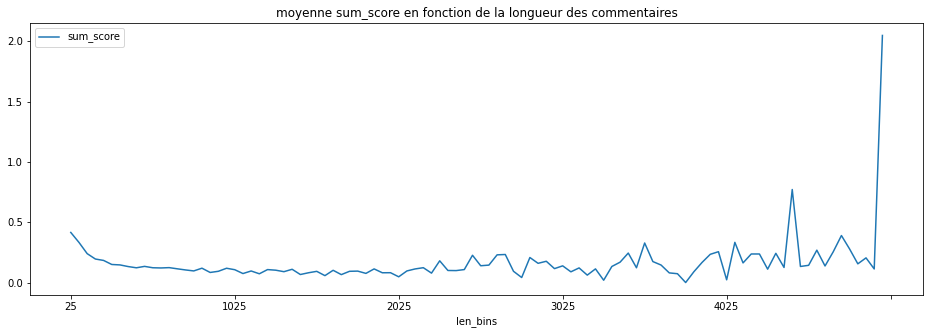

In [24]:
bins = 100
df1['len_bins'] = pd.cut(df1['text_len'],bins, labels=[int(5000/(bins*2)+5000/bins*i) for i in range(bins)])
df1.groupby('len_bins').agg({'sum_score':'mean'}).plot(figsize=(16,5))
plt.title('moyenne sum_score en fonction de la longueur des commentaires');

#### Les commentaires courts et très longs sont souvent plus toxiques que les autres.

### 2. Ratio des lettres majuscules

In [25]:
def count_upper(text):
    '''
    returns ratio of uppers only in alphabetic caracters
    '''
    if len(text)>0:
        alph = list(filter(str.isalpha, text))  # ne retient que les caractères alphabétiques
        if len(alph)>0:
            res = sum(map(str.isupper, alph)) / len(alph)
        else:
            res = 0
    else:
        res = 0
    return res

In [26]:
df1['ratio_upper'] = df1['comment_text'].apply(count_upper)

In [27]:
df1.head(5)

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\r\nWhy the edits made under my use...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\r\nMore\r\nI can't make any real suggestions...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  sum_score  text_len  \
0             0        0       0       0              0          0       265   
1             0        0       0       0              0          0       112   
2             0        0       0       0              0          0       233   
3             0        0       0       0              0          0       626   
4             0        0       0       0              0          0        67   

  len_bins  ratio_upper  
0      275     0.083744  
1      125     0.109589  
2      225     0.021505  
3      625     0.022634  
4       75     0.040000

In [28]:
non_tox = df1[df1['sum_score']<0.1]
non_tox['ratio_upper'].describe()

count    143346.000000
mean          0.060445
std           0.089457
min           0.000000
25%           0.026846
50%           0.041043
75%           0.063348
max           1.000000
Name: ratio_upper, dtype: float64

In [29]:
tox = df1[df1['sum_score']>0.1]
tox['ratio_upper'].describe()

count    16225.000000
mean         0.149216
std          0.274639
min          0.000000
25%          0.025210
50%          0.045822
75%          0.091922
max          1.000000
Name: ratio_upper, dtype: float64

#### le ratio de majuscule est 2.5 fois plus elevé sur les commentaires toxiques que sur les non toxiques

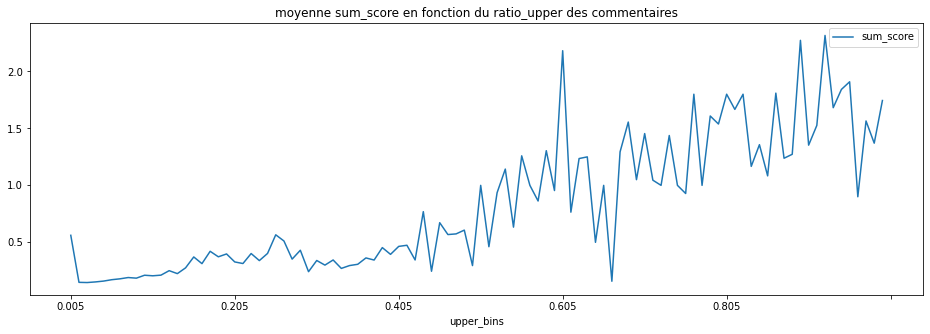

In [30]:
bins = 100
df1['upper_bins'] = pd.cut(df1['ratio_upper'],bins, labels=[round(1/(bins*2)+1/bins*i,4) for i in range(bins)])
df1.groupby('upper_bins').agg({'sum_score':'mean'}).plot(figsize=(16,5))
plt.title('moyenne sum_score en fonction du ratio_upper des commentaires');

### Il y a correlation assez nette entre le ratio de majuscules et le score.

### 3. Points d'exclamation

In [31]:
def count_exc(text):
    if len(text)>0:
        return text.count('!')/len(text)
    else:
        return 0

In [32]:
df1['ratio_excl'] = df1['comment_text'].apply(count_exc)
df1.head(5)

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\r\nWhy the edits made under my use...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\r\nMore\r\nI can't make any real suggestions...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  sum_score  text_len  \
0             0        0       0       0              0          0       265   
1             0        0       0       0              0          0       112   
2             0        0       0       0              0          0       233   
3             0        0       0       0              0          0       626   
4             0        0       0       0              0          0        67   

  len_bins  ratio_upper upper_bins  ratio_excl  
0      275     0.083744      0.085    0.000000  
1      125     0.109589      0.105    0.008929  
2      225     0.021505      0.025    0.000000  
3      625     0.022634      0.025    0.000000  
4       75     0.040000      0.035    0.000000

In [33]:
non_tox = df1[df1['sum_score']<0.1]
non_tox['ratio_excl'].describe()


count    143346.000000
mean          0.001525
std           0.011907
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.917197
Name: ratio_excl, dtype: float64

In [34]:
tox = df1[df1['sum_score']>0.1]
tox['ratio_excl'].describe()

count    16225.000000
mean         0.008780
std          0.039374
min          0.000000
25%          0.000000
50%          0.000000
75%          0.001645
max          0.993966
Name: ratio_excl, dtype: float64

#### Le ratio des points d'exclamation est 6 fois plus elevé chez les commentaire toxiques que chez les non toxiques

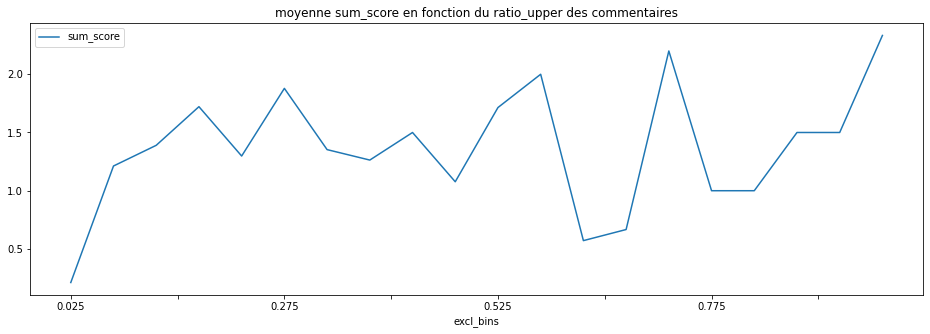

In [47]:
bins = 20
df1['excl_bins'] = pd.cut(df1['ratio_excl'],bins, labels=[round(1/(bins*2)+1/bins*i,4) for i in range(bins)])
df1.groupby('excl_bins').agg({'sum_score':'mean'}).plot(figsize=(16,5))
plt.title('moyenne sum_score en fonction du ratio_upper des commentaires');

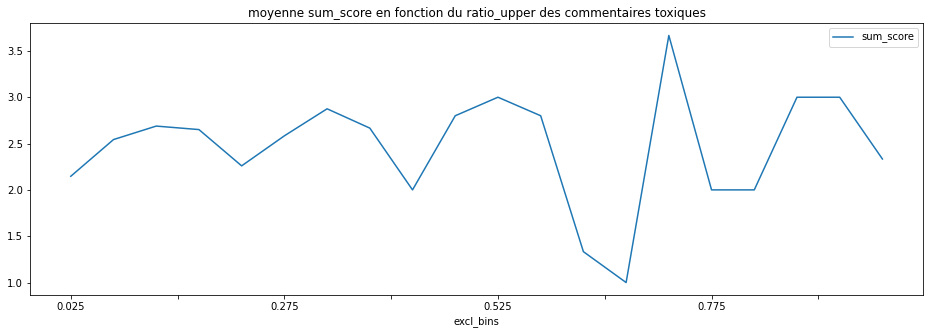

In [70]:
bins = 20
tox.loc[:]['excl_bins'] = pd.cut(tox['ratio_excl'],bins, labels=[round(1/(bins*2)+1/bins*i,4) for i in range(bins)])
tox.groupby('excl_bins').agg({'sum_score':'mean'}).plot(figsize=(16,5))
plt.title('moyenne sum_score en fonction du ratio_upper des commentaires toxiques');

### Un ratio supérieur à 5% est donne en moyenne un score supérieur à 1.

In [66]:
df1[df1['ratio_excl']>=0.05].describe()

toxic  severe_toxic      obscene       threat       insult  \
count  1219.000000   1219.000000  1219.000000  1219.000000  1219.000000   
mean      0.503692      0.121411     0.328138     0.022149     0.294504   
std       0.500192      0.326738     0.469728     0.147229     0.456006   
min       0.000000      0.000000     0.000000     0.000000     0.000000   
25%       0.000000      0.000000     0.000000     0.000000     0.000000   
50%       1.000000      0.000000     0.000000     0.000000     0.000000   
75%       1.000000      0.000000     1.000000     0.000000     1.000000   
max       1.000000      1.000000     1.000000     1.000000     1.000000   

       identity_hate    sum_score     text_len  ratio_upper   ratio_excl  
count    1219.000000  1219.000000  1219.000000  1219.000000  1219.000000  
mean        0.054143     1.324036   237.133716     0.383398     0.133499  
std         0.226392     1.555489   770.098523     0.388961     0.132396  
min         0.000000     0.000000    17.000000     0.000000     0.050000  
25%         0.000000     0.000000    35.000000     0.070208     0.060606  
50%         0.000000     1.000000    56.000000     0.169014     0.086957  
75%         0.000000     3.000000   109.000000     0.840455     0.141067  
max         1.000000     6.000000  5000.000000     1.000000     0.993966

In [67]:
tox[tox['ratio_excl']>=0.05].describe()

toxic  severe_toxic     obscene      threat      insult  \
count  628.000000    628.000000  628.000000  628.000000  628.000000   
mean     0.977707      0.235669    0.636943    0.042994    0.571656   
std      0.147752      0.424754    0.481264    0.203004    0.495233   
min      0.000000      0.000000    0.000000    0.000000    0.000000   
25%      1.000000      0.000000    0.000000    0.000000    0.000000   
50%      1.000000      0.000000    1.000000    0.000000    1.000000   
75%      1.000000      0.000000    1.000000    0.000000    1.000000   
max      1.000000      1.000000    1.000000    1.000000    1.000000   

       identity_hate   sum_score     text_len  ratio_upper  ratio_excl  
count     628.000000  628.000000   628.000000   628.000000  628.000000  
mean        0.105096    2.570064   336.673567     0.458097    0.142209  
std         0.306921    1.221757   956.024409     0.414031    0.140593  
min         0.000000    1.000000    18.000000     0.000000    0.050000  
25%         0.000000    1.000000    38.000000     0.072596    0.061593  
50%         0.000000    3.000000    70.500000     0.252907    0.091954  
75%         0.000000    3.000000   150.500000     1.000000    0.160000  
max         1.000000    6.000000  5000.000000     1.000000    0.993966

### En fait la moitié sont toxiques avec un score de toxicité environ 20% plus elevé que l'ensemble des messages toxiques

### Il semble alors judicieux de prendre en compte ces paramètres dans le calcul de scores pour notre modèle.

## Liens vers les noyaux Kaggle:
 * Noyau copié: https://www.kaggle.com/readoc/toxic-linear-model-pseudo-labelling-lb-0-864
 * Noyau perso tensorflow: https://www.kaggle.com/tisonludovic/rnn-tensorflow
 * Noyau perso OvR: https://www.kaggle.com/tisonludovic/ovr-jigsaw-sgd